Create the beginning of the K-Nearest Neighbor algorithm!

In [36]:
import pandas as pd
import numpy as np
from math import sqrt

## calculate the euclidean distance between "row" (a row in the data)
## and x (an object or example from the data)
def euclid_dist (row, x):

    ## initialize dist
    dist = 0
    
    ## create for loop to loop through the object x and compare each
    ## element to its mirror from "row"
    for ind, value in x.items():
        ## apply the distance formula and add each entry to dist
        dist += (row[ind] - value)**2
        
    ## take the square root and return
    return sqrt(dist)

## simple function to take a continuous column and normalize the values
## to between 0 and 1
def normalization_of_values (data):

    ## create a list of all the attributes in data
    attributes = list(data.columns.values)
    ##remove the class column, does not need to be normalized
    attributes.remove('class')
    
    ## apply the min/max formula from the book to normalize
    for x in attributes:
        data[x] = ((data[x] - data[x].min())/(data[x].max() - data[x].min()))
        
    return data
    
## create a function to classify examples in the dataset
def knn_classification (train, k, x):
    
    ## create an array for the euclidean distances of each attribute
    dist_list = []
    i = 0
    # run through a for loop to append the distance function to dist_list
    for ind, row in train.iterrows():
        dist = euclid_dist(row, x)
        dist_list.append((ind, dist))
        
    ## sort the disatance array
    dist_list = sorted(dist_list, key = lambda distance:distance[1])
    ## account for potential different k's
    indices = [item[0] for item in dist_list[0:k]]
    nearest_neighbors = train.iloc[indices]
    ## return the class of the k-nearest neighbor
    return nearest_neighbors['class'].value_counts().idxmax()

First Dataset: Wine (found at http://archive.ics.uci.edu/ml/datasets/Wine)

In [125]:
## read in csv for Wine dataset
wine = pd.read_csv('/Users/ksc0tt/Desktop/wine.csv')
wine.columns = [ 'class', 'alcohol', 'malicAcid', 'ash',
                'ashAlcalinity', 'magnesium', 'totalPhenols',
                 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins',
                'colorIntensity', 'hue', 'od280_od315', 'proline']
## normalize columns
wine = normalization_of_values(wine)
## numpy function to split data 70/30 into training set and testing set
msk = np.random.rand(len(wine)) < 0.7
train = ((wine.iloc[msk]).reset_index()).drop(columns='index')
display(train)
test = ((wine.iloc[~msk]).reset_index()).drop(columns='index')
display(test)

attributes = list(train.columns.values); attributes.remove('class');
x = test[attributes]
display(x)

,class,alcohol,malicAcid,ash,ashAlcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
1,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
2,1,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
3,1,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
4,1,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
107,3,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
108,3,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
109,3,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


,class,alcohol,malicAcid,ash,ashAlcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
2,1,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
3,1,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076
4,1,0.807895,0.280632,0.502674,0.381443,0.380435,0.679310,0.628692,0.169811,0.621451,0.381399,0.626016,0.695971,0.878745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3,0.478947,0.500000,0.652406,0.587629,0.391304,0.231034,0.054852,0.886792,0.173502,0.366894,0.317073,0.307692,0.208274
62,3,0.507895,0.535573,0.529412,0.407216,0.391304,0.141379,0.075949,0.509434,0.167192,0.341297,0.162602,0.175824,0.283167
63,3,0.710526,0.715415,0.481283,0.613402,0.195652,0.103448,0.027426,0.735849,0.233438,0.455631,0.243902,0.175824,0.172611
64,3,0.636842,0.584980,0.663102,0.639175,0.445652,0.248276,0.122363,0.566038,0.331230,0.802048,0.300813,0.106227,0.297432


,alcohol,malicAcid,ash,ashAlcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
2,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
3,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076
4,0.807895,0.280632,0.502674,0.381443,0.380435,0.679310,0.628692,0.169811,0.621451,0.381399,0.626016,0.695971,0.878745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.478947,0.500000,0.652406,0.587629,0.391304,0.231034,0.054852,0.886792,0.173502,0.366894,0.317073,0.307692,0.208274
62,0.507895,0.535573,0.529412,0.407216,0.391304,0.141379,0.075949,0.509434,0.167192,0.341297,0.162602,0.175824,0.283167
63,0.710526,0.715415,0.481283,0.613402,0.195652,0.103448,0.027426,0.735849,0.233438,0.455631,0.243902,0.175824,0.172611
64,0.636842,0.584980,0.663102,0.639175,0.445652,0.248276,0.122363,0.566038,0.331230,0.802048,0.300813,0.106227,0.297432


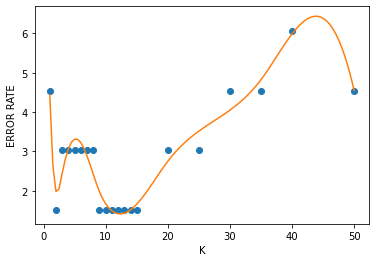

In [126]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

error = []
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,50]
for k in kVals:
    success = 0
    fail = 0
    for i in range(len(test)):
        v = x.iloc[i]
        class_v = (test.iloc[i])['class'] 
        result = knn_classification(train, k, v)
        if result == class_v:
            success += 1
        else:
            fail += 1
    error.append(100*(fail/len(test)))

plt.ylabel("ERROR RATE")
plt.xlabel("K")
z = UnivariateSpline(kVals, error, s=2)
xs = np.linspace(1, 50, 100)
ys = z(xs)
plt.plot(kVals, error, 'o')
plt.plot(xs, ys)
plt.show()

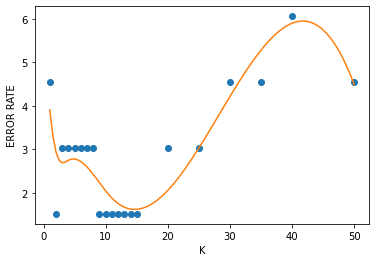

[4.545454545454546, 1.5151515151515151, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 1.5151515151515151, 1.5151515151515151, 1.5151515151515151, 1.5151515151515151, 1.5151515151515151, 1.5151515151515151, 1.5151515151515151, 3.0303030303030303, 3.0303030303030303, 4.545454545454546, 4.545454545454546, 6.0606060606060606, 4.545454545454546]


In [128]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

plt.ylabel("ERROR RATE")
plt.xlabel("K")
z = UnivariateSpline(kVals, error, s=6)
xs = np.linspace(1, 50, 100)
ys = z(xs)
plt.plot(kVals, error, 'o')
plt.plot(xs, ys)
plt.show()

print(error)

In [129]:
bc = pd.read_csv('/Users/ksc0tt/Desktop/bc.csv')
bc.head()
bc = bc.drop(['id', 'Unnamed: 32'], axis = 1)
bc.head()
bc.rename(columns = {'diagnosis':'class'}, inplace = True)
bc.head()

## change 'M' and 'B' from class to 0 and 1
def class_value(classV):
    if classV == 'M':
        return 1
    else:
        return 0

bc['class'] = bc['class'].apply(class_value)
bc.head()

bc = normalization_of_values(bc)
## numpy function to split data 70/30 into training set and testing set
msk = np.random.rand(len(bc)) < 0.7
train = ((bc.iloc[msk]).reset_index()).drop(columns='index')
display(train)
test = ((bc.iloc[~msk]).reset_index()).drop(columns='index')
display(test)

attributes = list(train.columns.values); attributes.remove('class');
x = test[attributes]
display(x)

,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
1,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
2,1,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
3,1,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
4,1,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
389,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
390,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
391,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
2,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
3,1,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
4,1,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0,0.150457,0.334122,0.144703,0.071347,0.430351,0.170726,0.011774,0.055467,0.369192,...,0.096763,0.289446,0.087006,0.039840,0.365383,0.089948,0.008027,0.076701,0.137394,0.081202
172,0,0.115576,0.614474,0.106903,0.054210,0.258193,0.093031,0.000000,0.000000,0.344444,...,0.091071,0.592217,0.080133,0.035735,0.238592,0.042970,0.000000,0.000000,0.179381,0.096091
173,0,0.360121,0.438620,0.363486,0.217858,0.289790,0.348506,0.241097,0.185686,0.198990,...,0.268588,0.406450,0.276358,0.134757,0.207555,0.281175,0.292492,0.379725,0.136606,0.163977
174,0,0.214350,0.480893,0.212356,0.110286,0.360928,0.253727,0.260544,0.204026,0.165657,...,0.161864,0.670043,0.158723,0.071028,0.387176,0.217724,0.289936,0.331718,0.107826,0.211728


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
2,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
3,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
4,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.150457,0.334122,0.144703,0.071347,0.430351,0.170726,0.011774,0.055467,0.369192,0.281171,...,0.096763,0.289446,0.087006,0.039840,0.365383,0.089948,0.008027,0.076701,0.137394,0.081202
172,0.115576,0.614474,0.106903,0.054210,0.258193,0.093031,0.000000,0.000000,0.344444,0.223884,...,0.091071,0.592217,0.080133,0.035735,0.238592,0.042970,0.000000,0.000000,0.179381,0.096091
173,0.360121,0.438620,0.363486,0.217858,0.289790,0.348506,0.241097,0.185686,0.198990,0.242418,...,0.268588,0.406450,0.276358,0.134757,0.207555,0.281175,0.292492,0.379725,0.136606,0.163977
174,0.214350,0.480893,0.212356,0.110286,0.360928,0.253727,0.260544,0.204026,0.165657,0.331508,...,0.161864,0.670043,0.158723,0.071028,0.387176,0.217724,0.289936,0.331718,0.107826,0.211728


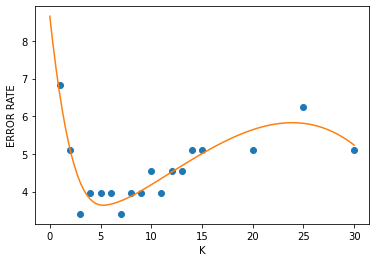

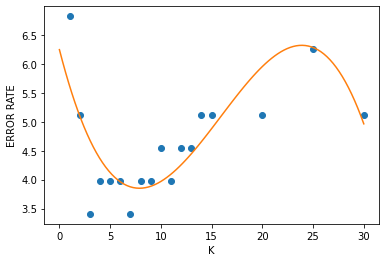

[6.8181818181818175, 5.113636363636364, 3.4090909090909087, 3.977272727272727, 3.977272727272727, 3.977272727272727, 3.4090909090909087, 3.977272727272727, 3.977272727272727, 4.545454545454546, 3.977272727272727, 4.545454545454546, 4.545454545454546, 5.113636363636364, 5.113636363636364, 5.113636363636364, 6.25, 5.113636363636364]


In [130]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

error = []
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]
for k in kVals:
    success = 0
    fail = 0
    for i in range(len(test)):
        v = x.iloc[i]
        class_v = (test.iloc[i])['class'] 
        result = knn_classification(train, k, v)
        if result == class_v:
            success += 1
        else:
            fail += 1
    error.append(100*(fail/len(test)))

plt.ylabel("ERROR RATE")
plt.xlabel("K")
z = UnivariateSpline(kVals, error, s=2)
xs = np.linspace(0, 30, 100)
ys = z(xs)
plt.plot(kVals, error, 'o')
plt.plot(xs, ys)
plt.show()

plt.ylabel("ERROR RATE")
plt.xlabel("K")
z = UnivariateSpline(kVals, error, s=6)
xs = np.linspace(0, 30, 100)
ys = z(xs)
plt.plot(kVals, error, 'o')
plt.plot(xs, ys)
plt.show()

print(error)